In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [3]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]#numerical variables
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','city']]

<Axes: >

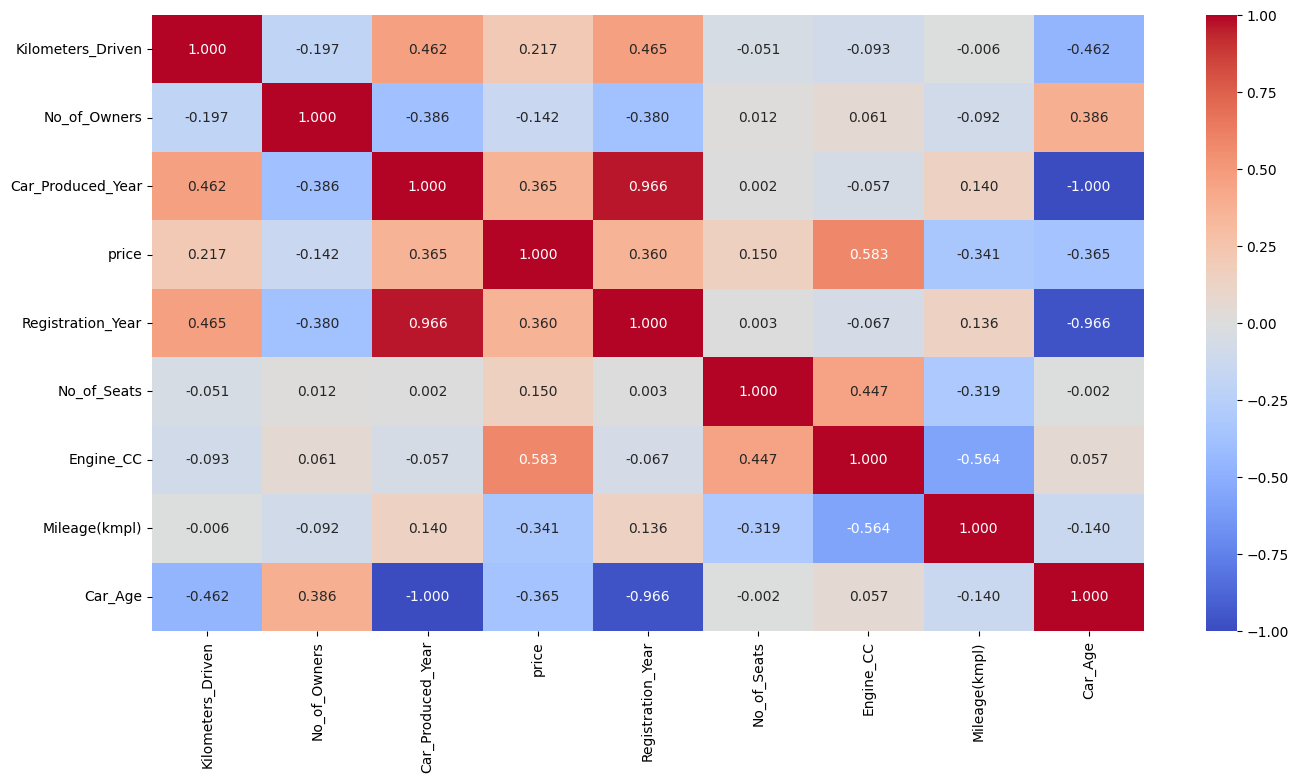

In [4]:
#Detect multicollinearity (features with high correlation)

plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

#-1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

1.Car_Age vs. Car_Produced_Year:
Strong negative correlation (-1.0): Older cars are associated with earlier production years.
2.Registration_Year vs. Car_Produced_Year:
Very strong positive correlation (0.959): Registration year is closely tied to the car's production year.
3.Price vs. Engine_CC:
Moderate positive correlation (0.537): Cars with larger engine capacities tend to have higher prices.
4.Mileage(kmpl) vs. Engine_CC:
Negative correlation (-0.526): Cars with larger engines may have lower mileage.


In [5]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [6]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 5.744551872269694e-35
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type city 8.517944982249523e-36
Transmission_Type Fuel_Type 5.744551872269694e-35
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type city 1.5033196651072457e-29
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By city 6.440139436818766e-31
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model city 4.9227565484917076e-52
city Fuel_Type 8.517944982249403e-36
city Transmission_Type 1.5033196651072348e-29
city Manufactured_By 6.440139436818763e-31
city Car_Model 4.9227565484917e-52
city city 0.0


In [7]:
features = df.drop('price',axis = 1)
target = df['price']

In [8]:
X = df.drop('price',axis = 1)
y = df['price']

In [9]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [10]:
import pickle
with open('standard.pkl','wb') as f:
    pickle.dump(scaler,f)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6068, 11), (2023, 11), (6068,), (2023,))

In [12]:
X_train.head()

,Fuel_Type,Kilometers_Driven,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Transmission_Type,Mileage(kmpl),Engine_CC,No_of_Seats,city
1298,1.0,0.000111,1,17.0,144.0,2020,0.0,19.31,2184,4,0.0
426,4.0,0.000100,1,27.0,239.0,2022,0.0,19.03,999,5,0.0
5418,1.0,0.000040,1,12.0,101.0,2022,0.0,14.90,1956,5,3.0
805,1.0,0.000012,3,20.0,180.0,2010,1.0,19.30,1248,5,0.0
3571,4.0,0.000077,1,8.0,63.0,2020,1.0,17.40,1497,5,2.0


LINEAR REGRESSION MODEL

In [13]:
from sklearn.linear_model import LinearRegression

# Initialize the model
models = LinearRegression()

# Fit the model on the training data
models.fit(X_train, y_train)

# Optionally, you can make predictions on the test set
y_pred = models.predict(X_test)

# Display predictions (optional)
y_pred

array([ 550475.15843689, 2563548.93691489,  139945.68220982, ...,
        896911.86524132, 1377670.24490485, 1953598.4383415 ])

In [14]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# for evaluation / accuracy--  prediction + y_test
# Display the results
print(f"Mean Absolute Error (MAE): {mae:f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 358494.907536
Mean Squared Error (MSE): 368363354090.24
R-squared: 0.5807
Root Mean Squared Error: 606929.4473744378


RANDOM FOREST

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


model = RandomForestRegressor(random_state=42,n_estimators=350,max_depth=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('root mean square :',r2_score(y_test, y_pred))
a=mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {a:.2f}")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 368363354090.2405
root mean square : 0.8859030600960804
Mean Absolute Error (MAE): 135882.08
Root Mean Squared Error: 316603.7577791571


XG BOOST

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Assuming X and y are your features and target variable

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("XGBoost Tuned Results:")
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
XGBoost Tuned Results:
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 65199906041.6497
R-squared Score: 0.9258
Mean Absolute Error: 113778.4764
Root Mean Squared Error: 255342.7227


Gradient boosting

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming X and y are your features and target variable

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Gradient Boosting Regressor Results:
Mean Squared Error: 124994815479.9944
R-squared Score: 0.8577
Mean Absolute Error: 178020.0250
Root Mean Squared Error: 353546.0585


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        results = []

        for algorithm in algorithms:

                model=algorithm().fit(X_train,y_train)
                y_pred=model.predict(X_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                print(f"Trainscore: {model.score(X_train, y_train)}")
                print(f"Testscore: {model.score(X_test, y_test)}")
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(results)
        
        return results_df   

In [23]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import xgboost as xgb

def compare_models(X, y):
    # Split the data first
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42, colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.8),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        
    }
    
    # Dictionary to store results
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Store results
        results[name] = {
            'MSE': mse,
            'R2': r2,
            'MAE': mae,
            'RMSE': rmse
        }
    
    # Print results
    for name, metrics in results.items():
        print(f"\n{name} Results:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    # Determine the best model
    best_model = max(results, key=lambda x: results[x]['R2'])
    print(f"\nBest model based on R2 score: {best_model}")
    
    return results

# Usage
results = compare_models(X, y)


Linear Regression Results:
MSE: 365433873878.0023
R2: 0.5922
MAE: 357919.9029
RMSE: 604511.2686

Random Forest Results:
MSE: 95961534874.8109
R2: 0.8929
MAE: 135113.8343
RMSE: 309776.5886

XGBoost Results:
MSE: 71677192122.0962
R2: 0.9200
MAE: 121610.3312
RMSE: 267725.9646

Gradient Boosting Results:
MSE: 124569656543.0511
R2: 0.8610
MAE: 176617.7756
RMSE: 352944.2683

Best model based on R2 score: XGBoost


In [ ]:
MODEL PICKLING

In [24]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'xgb_final_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [25]:
import joblib

joblib.dump(gb_model, 'gradientboost.pkl')

['gradientboost.pkl']

In [26]:
import joblib

joblib.dump(models, 'linarreg.pkl')

['linarreg.pkl']

In [27]:
import joblib

joblib.dump(model, 'randomforest.pkl')

['randomforest.pkl']

In [33]:
# load the model,scaler and encoder
with open('xgb_final_model.pkl','rb') as files:
    final_model=pickle.load(files)

with open('standard.pkl','rb') as f:
    scaler=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

In [28]:
print(model.feature_names_in_)

['Fuel_Type' 'Kilometers_Driven' 'No_of_Owners' 'Manufactured_By'
 'Car_Model' 'Car_Produced_Year' 'Transmission_Type' 'Mileage(kmpl)'
 'Engine_CC' 'No_of_Seats' 'city']


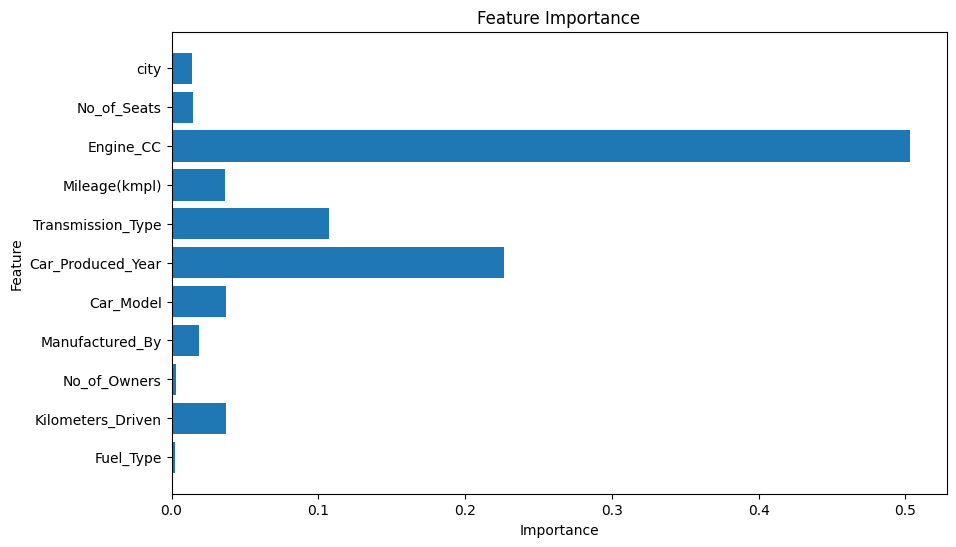

In [29]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [30]:
X_train.head()

,Fuel_Type,Kilometers_Driven,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Transmission_Type,Mileage(kmpl),Engine_CC,No_of_Seats,city
1298,1.0,0.000111,1,17.0,144.0,2020,0.0,19.31,2184,4,0.0
426,4.0,0.000100,1,27.0,239.0,2022,0.0,19.03,999,5,0.0
5418,1.0,0.000040,1,12.0,101.0,2022,0.0,14.90,1956,5,3.0
805,1.0,0.000012,3,20.0,180.0,2010,1.0,19.30,1248,5,0.0
3571,4.0,0.000077,1,8.0,63.0,2020,1.0,17.40,1497,5,2.0
